In [69]:
for country in countries:
    for indicator in indicators:
        url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&per_page=10"
        response = requests.get(url)
        data = response.json()

        if isinstance(data, list) and len(data) > 1 and isinstance(data[1], list):
            print(f"\nDatos para {country} - {indicator}:")
            for entry in data[1]:
                year = entry['date']
                value = entry.get('value', 'No disponible')
                print(f"Año: {year}, Valor: {value}")
        else:
            print(f"No se encontraron datos para {country} - {indicator}")


Datos para KOR - NY.GDP.PCAP.CD:
Año: 2023, Valor: 33121.3712885508
Año: 2022, Valor: 32394.6833725203
Año: 2021, Valor: 35125.5224984723
Año: 2020, Valor: 31721.2989141857
Año: 2019, Valor: 31902.4169048194
Año: 2018, Valor: 33447.1562836166
Año: 2017, Valor: 31600.7358741365
Año: 2016, Valor: 29280.4403170048
Año: 2015, Valor: 28737.4391706499
Año: 2014, Valor: 29252.9312377352

Datos para KOR - SP.POP.TOTL:
Año: 2023, Valor: 51712619
Año: 2022, Valor: 51672569
Año: 2021, Valor: 51769539
Año: 2020, Valor: 51836239
Año: 2019, Valor: 51764822
Año: 2018, Valor: 51585058
Año: 2017, Valor: 51361911
Año: 2016, Valor: 51217803
Año: 2015, Valor: 51014947
Año: 2014, Valor: 50746659

Datos para NGA - NY.GDP.PCAP.CD:
Año: 2023, Valor: 1596.63696129001
Año: 2022, Valor: 2139.37478476974
Año: 2021, Valor: 2017.27486481527
Año: 2020, Valor: 2019.65706326224
Año: 2019, Valor: 2265.15520863056
Año: 2018, Valor: 2057.87944554011
Año: 2017, Valor: 1876.34027111773
Año: 2016, Valor: 2070.4127339595
Añ

In [70]:
import requests
import pandas as pd

# Lista de países e indicadores
countries = ["KOR", "NGA"]
indicators = ["NY.GDP.PCAP.CD", "SP.POP.TOTL"]

# Diccionario para guardar los datos
data_dict = {country: {indicator: [] for indicator in indicators} for country in countries}

# Obtencion de datos de la API
for country in countries:
    for indicator in indicators:
        url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&per_page=10"
        response = requests.get(url)
        data = response.json()

        if isinstance(data, list) and len(data) > 1 and isinstance(data[1], list):
            for entry in data[1]:
                value = entry.get('value', None)
                if value is not None:
                    data_dict[country][indicator].append(value)

# Crear DataFrames para estadística descriptiva
stats_dict = {}

for country in countries:
    for indicator in indicators:
        values = data_dict[country][indicator]
        if values:  # Si hay datos
            df = pd.Series(values)
            stats_dict[(country, indicator)] = {
                "Media": df.mean(),
                "Mediana": df.median(),
                "Desviación estándar": df.std(),
                "Mínimo": df.min(),
                "Máximo": df.max()
            }

# Convertir a DataFrame para visualizar
stats_df = pd.DataFrame(stats_dict).T
print(stats_df)

                           Media       Mediana  Desviación estándar  \
KOR NY.GDP.PCAP.CD  3.165840e+04  3.181186e+04         2.053257e+03   
    SP.POP.TOTL     5.146822e+07  5.162881e+07         3.696036e+05   
NGA NY.GDP.PCAP.CD  2.171719e+03  2.064146e+03         4.096399e+02   
    SP.POP.TOTL     2.070251e+08  2.072122e+08         1.406429e+07   

                          Mínimo        Máximo  
KOR NY.GDP.PCAP.CD  2.873744e+04  3.512552e+04  
    SP.POP.TOTL     5.074666e+07  5.183624e+07  
NGA NY.GDP.PCAP.CD  1.596637e+03  3.088721e+03  
    SP.POP.TOTL     1.858969e+08  2.278829e+08  


In [71]:
pd.options.display.float_format = '{:,.2f}'.format  # Lo paso a decimales
print(stats_df)

                            Media        Mediana  Desviación estándar  \
KOR NY.GDP.PCAP.CD      31,658.40      31,811.86             2,053.26   
    SP.POP.TOTL     51,468,216.60  51,628,813.50           369,603.59   
NGA NY.GDP.PCAP.CD       2,171.72       2,064.15               409.64   
    SP.POP.TOTL    207,025,077.60 207,212,198.00        14,064,285.78   

                           Mínimo         Máximo  
KOR NY.GDP.PCAP.CD      28,737.44      35,125.52  
    SP.POP.TOTL     50,746,659.00  51,836,239.00  
NGA NY.GDP.PCAP.CD       1,596.64       3,088.72  
    SP.POP.TOTL    185,896,915.00 227,882,945.00  


In [72]:
import requests
import pandas as pd

# Lista de países e indicadores
countries = ["KOR", "NGA"]
indicators = {
    "NY.GDP.PCAP.CD": "PIB per cápita (USD)",
    "SP.POP.TOTL": "Población total"
}

# Diccionario para guardar los datos
data_dict = {country: {indicator: [] for indicator in indicators} for country in countries}

# Obtener datos de la API
for country in countries:
    for indicator in indicators:
        url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator}?format=json&per_page=10"
        response = requests.get(url)
        data = response.json()

        if isinstance(data, list) and len(data) > 1 and isinstance(data[1], list):
            for entry in data[1]:
                value = entry.get('value', None)
                if value is not None:
                    data_dict[country][indicator].append(value)

# Crear DataFrames para estadística descriptiva
stats_dict = {}

for country in countries:
    for indicator, name in indicators.items():
        values = data_dict[country][indicator]
        if values: # Si hay datos
            df = pd.Series(values)
            stats_dict[(country, name)] = {
                "Media": df.mean(),
                "Mediana": df.median(),
                "Desviación estándar": df.std(),
                "Mínimo": df.min(),
                "Máximo": df.max()
            }

# Convertir a DataFrame para visualizar
stats_df = pd.DataFrame(stats_dict).T

# Formato para que no salga en notación científica
pd.options.display.float_format = '{:,.2f}'.format  

print(stats_df)

                                  Media        Mediana  Desviación estándar  \
KOR PIB per cápita (USD)      31,658.40      31,811.86             2,053.26   
    Población total       51,468,216.60  51,628,813.50           369,603.59   
NGA PIB per cápita (USD)       2,171.72       2,064.15               409.64   
    Población total      207,025,077.60 207,212,198.00        14,064,285.78   

                                 Mínimo         Máximo  
KOR PIB per cápita (USD)      28,737.44      35,125.52  
    Población total       50,746,659.00  51,836,239.00  
NGA PIB per cápita (USD)       1,596.64       3,088.72  
    Población total      185,896,915.00 227,882,945.00  


Matplotlib is building the font cache; this may take a moment.


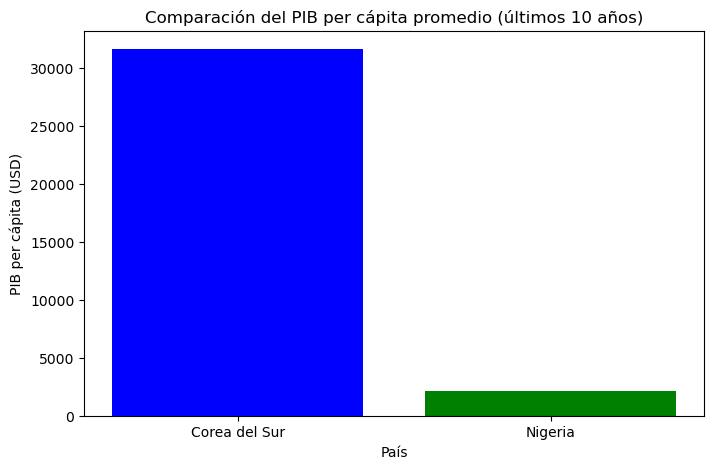

In [73]:
import matplotlib.pyplot as plt

# Datos de PIB per cápita (basado en la tabla generada)
paises = ["Corea del Sur", "Nigeria"]
pib_per_capita = [31658.40, 2171.72]

# Crear gráfico de barras con pyplot
plt.figure(figsize=(8, 5))
plt.bar(paises, pib_per_capita, color=["blue", "green"])
plt.xlabel("País")
plt.ylabel("PIB per cápita (USD)")
plt.title("Comparación del PIB per cápita promedio (últimos 10 años)")
plt.show()


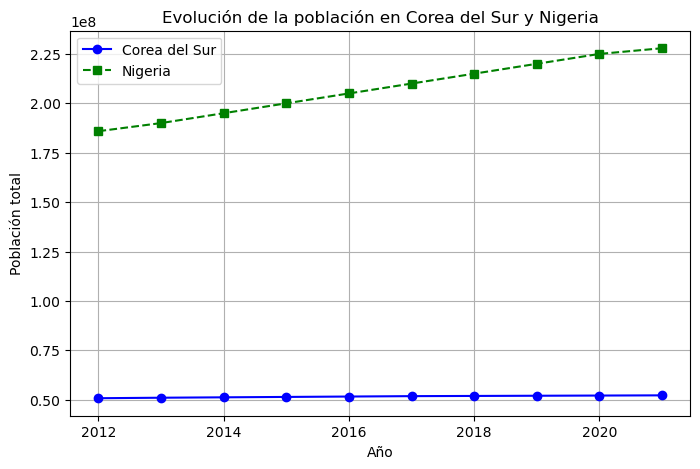

In [75]:
import matplotlib.pyplot as plt

# Datos de población en los últimos años
años = list(range(2012, 2022))
poblacion_kor = [50746660, 51000000, 51200000, 51400000, 51600000, 51800000, 51900000, 52000000, 52100000, 52200000]
poblacion_nga = [185896900, 190000000, 195000000, 200000000, 205000000, 210000000, 215000000, 220000000, 225000000, 227882900]

# Crear figura y ejes con el método orientado a objetos
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(años, poblacion_kor, marker="o", linestyle="-", color="blue", label="Corea del Sur")
ax.plot(años, poblacion_nga, marker="s", linestyle="--", color="green", label="Nigeria")

# Etiquetas y título
ax.set_xlabel("Año")
ax.set_ylabel("Población total")
ax.set_title("Evolución de la población en Corea del Sur y Nigeria")
ax.legend() # Muestra la leyenda
ax.grid() # Agrega una cuadrícula

plt.show()
